In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option("display.max_rows",300)
pd.set_option("display.max_columns",300)

Following the pipeline-
1.Reading the data
2.Data Cleaning
3.Filter High value customers
4.Derive Churn(Target variable)
5.Data Preparation
6.Modelling


In [4]:
from google.colab import files
uploaded=files.upload()

Saving telecom_churn_data.csv to telecom_churn_data.csv


In [5]:
import io
data=pd.read_csv(io.BytesIO(uploaded['telecom_churn_data.csv']))

In [6]:
data=pd.read_csv("telecom_churn_data.csv")

In [7]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [9]:
np.round((data.isnull().sum()/len(data.index)*100),2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

High Missing values in - date of last recharge, total recharge, max_reach, av recharge amount, arpu, night pack user, fb user

In [10]:
sixth_month=data.loc[data.date_of_last_rech_data_6.isnull(),["date_of_last_rech_data_6","total_rech_num_6","total_rech_amt_6","max_rech_amt_6","date_of_last_rech_6","last_day_rch_amt_6","date_of_last_rech_data_6","total_rech_data_6","max_rech_data_6","count_rech_2g_6","count_rech_3g_6","av_rech_amt_data_6","vol_2g_mb_6","vol_3g_mb_6","arpu_3g_6","arpu_2g_6"]]

In [11]:
sixth_month.head(10)

,date_of_last_rech_data_6,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,date_of_last_rech_6,last_day_rch_amt_6,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6,vol_2g_mb_6,vol_3g_mb_6,arpu_3g_6,arpu_2g_6
1,NaN,4,74,44,6/29/2014,44,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2,NaN,5,168,86,6/17/2014,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,NaN,10,230,60,6/28/2014,30,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
5,NaN,2,120,120,6/19/2014,120,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
6,NaN,15,499,90,6/28/2014,37,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
7,NaN,5,1580,1580,6/27/2014,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
8,NaN,19,437,90,6/25/2014,50,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
9,NaN,4,220,110,6/29/2014,110,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
10,NaN,1,0,0,6/14/2014,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
11,NaN,6,366,110,6/18/2014,110,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [12]:
## we can see that the last date of data recharge is NaN for those consumers who have not used any data. It is bound to be NaN.
## Also, we have the data on data usage that is logical, as in, consumers having no data requirement have not had recharged their phones
## with data, which is captured by 2g_data and 3g_data consumption as 0. Hence, it can be dropped.


In [13]:
data.drop(columns=["date_of_last_rech_data_6","date_of_last_rech_data_7","date_of_last_rech_data_8","date_of_last_rech_data_9"],inplace=True)

In [14]:
## Since there is no data recharge by certain consumers, we can say that the total recharge amount is 0. So, we
## can fill the NA in total recharge data as 0.

In [15]:
data["total_rech_data_6"]=data.total_rech_data_6.fillna(0)

In [16]:
data["total_rech_data_7"]=data.total_rech_data_7.fillna(0)
data["total_rech_data_8"]=data.total_rech_data_8.fillna(0)
data["total_rech_data_9"]=data.total_rech_data_9.fillna(0)

In [17]:
data["max_rech_data_6"]=data.max_rech_data_6.fillna(0)
data["max_rech_data_7"]=data.max_rech_data_7.fillna(0)
data["max_rech_data_8"]=data.max_rech_data_8.fillna(0)
data["max_rech_data_9"]=data.max_rech_data_9.fillna(0)

In [18]:
data[["count_rech_2g_6","count_rech_2g_7","count_rech_2g_8","count_rech_2g_9","count_rech_3g_6","count_rech_3g_7","count_rech_3g_8","count_rech_3g_9"]].fillna(0)


,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9
0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
99994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,1.0,0.0,0.0,0.0,2.0,2.0,4.0,4.0


In [19]:
data[["arpu_3g_6","arpu_3g_7","arpu_3g_8","arpu_3g_9","arpu_2g_6","arpu_2g_7","arpu_2g_8","arpu_2g_9"]]=data[["arpu_3g_6","arpu_3g_7","arpu_3g_8","arpu_3g_9","arpu_2g_6","arpu_2g_7","arpu_2g_8","arpu_2g_9"]].fillna(0)

In [20]:
data.night_pck_user_6.value_counts(normalize=True)

0.0    0.974914
1.0    0.025086
Name: night_pck_user_6, dtype: float64

In [21]:
## Since the data in night_pck_user_6 has a mode of 0, it will be safe to impute the missing values with 0

In [22]:
data["night_pck_user_6"]=data.night_pck_user_6.fillna(0)

In [23]:
data.night_pck_user_7.value_counts(normalize=True)

0.0    0.976966
1.0    0.023034
Name: night_pck_user_7, dtype: float64

In [24]:
data["night_pck_user_7"]=data.night_pck_user_7.fillna(0)

In [25]:
data.night_pck_user_8.value_counts(normalize=True)

0.0    0.979156
1.0    0.020844
Name: night_pck_user_8, dtype: float64

In [26]:
data["night_pck_user_8"]=data.night_pck_user_8.fillna(0)

In [27]:
data.night_pck_user_9.value_counts(normalize=True)

0.0    0.984029
1.0    0.015971
Name: night_pck_user_9, dtype: float64

In [28]:
data["night_pck_user_9"]=data.night_pck_user_9.fillna(0)

In [29]:
data.fb_user_6.describe()

count    25153.000000
mean         0.914404
std          0.279772
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: fb_user_6, dtype: float64

In [30]:
data.fb_user_6.value_counts(normalize=True)

1.0    0.914404
0.0    0.085596
Name: fb_user_6, dtype: float64

In [31]:
## However, the missing values in fb_user_6 has NaN values where there is no data bought by the user.

In [32]:
data["fb_user_6"]=data.fb_user_6.fillna(0)

In [33]:
data["fb_user_7"]=data.fb_user_7.fillna(0)

In [34]:
data["fb_user_8"]=data.fb_user_8.fillna(0)
data["fb_user_9"]=data.fb_user_9.fillna(0)

In [35]:
np.round((data.isnull().sum()/len(data.index)*100),2)

mobile_number            0.00
circle_id                0.00
loc_og_t2o_mou           1.02
std_og_t2o_mou           1.02
loc_ic_t2o_mou           1.02
last_date_of_month_6     0.00
last_date_of_month_7     0.60
last_date_of_month_8     1.10
last_date_of_month_9     1.66
arpu_6                   0.00
arpu_7                   0.00
arpu_8                   0.00
arpu_9                   0.00
onnet_mou_6              3.94
onnet_mou_7              3.86
onnet_mou_8              5.38
onnet_mou_9              7.75
offnet_mou_6             3.94
offnet_mou_7             3.86
offnet_mou_8             5.38
offnet_mou_9             7.75
roam_ic_mou_6            3.94
roam_ic_mou_7            3.86
roam_ic_mou_8            5.38
roam_ic_mou_9            7.75
roam_og_mou_6            3.94
roam_og_mou_7            3.86
roam_og_mou_8            5.38
roam_og_mou_9            7.75
loc_og_t2t_mou_6         3.94
loc_og_t2t_mou_7         3.86
loc_og_t2t_mou_8         5.38
loc_og_t2t_mou_9         7.75
loc_og_t2m

In [36]:
data.count_rech_2g_6.describe()

count    25153.000000
mean         1.864668
std          2.570254
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         42.000000
Name: count_rech_2g_6, dtype: float64

In [37]:
data.count_rech_2g_6.value_counts(normalize=True)

1.0     0.433427
0.0     0.235360
2.0     0.128812
3.0     0.058085
4.0     0.039121
5.0     0.025245
6.0     0.018964
7.0     0.014352
8.0     0.011410
9.0     0.009462
10.0    0.007792
11.0    0.004970
12.0    0.004413
13.0    0.002028
14.0    0.001829
15.0    0.001073
17.0    0.000755
16.0    0.000636
18.0    0.000517
19.0    0.000477
20.0    0.000278
22.0    0.000278
21.0    0.000199
24.0    0.000119
25.0    0.000119
28.0    0.000080
34.0    0.000040
30.0    0.000040
32.0    0.000040
39.0    0.000040
42.0    0.000040
Name: count_rech_2g_6, dtype: float64

In [38]:
## In this case count should be 0 as the consumer has not been using data, which is evident from other features like avg and total data 
## recharge.

In [39]:
data["count_rech_2g_6"]=data.count_rech_2g_6.fillna(0)

In [40]:
data[["count_rech_2g_7","count_rech_2g_8","count_rech_2g_9","count_rech_3g_6","count_rech_3g_7","count_rech_3g_8","count_rech_3g_9"]]=data[["count_rech_2g_7","count_rech_2g_8","count_rech_2g_9","count_rech_3g_6","count_rech_3g_7","count_rech_3g_8","count_rech_3g_9"]].fillna(0)

In [41]:
np.round((data.isnull().sum()/len(data.index)*100),2)

mobile_number            0.00
circle_id                0.00
loc_og_t2o_mou           1.02
std_og_t2o_mou           1.02
loc_ic_t2o_mou           1.02
last_date_of_month_6     0.00
last_date_of_month_7     0.60
last_date_of_month_8     1.10
last_date_of_month_9     1.66
arpu_6                   0.00
arpu_7                   0.00
arpu_8                   0.00
arpu_9                   0.00
onnet_mou_6              3.94
onnet_mou_7              3.86
onnet_mou_8              5.38
onnet_mou_9              7.75
offnet_mou_6             3.94
offnet_mou_7             3.86
offnet_mou_8             5.38
offnet_mou_9             7.75
roam_ic_mou_6            3.94
roam_ic_mou_7            3.86
roam_ic_mou_8            5.38
roam_ic_mou_9            7.75
roam_og_mou_6            3.94
roam_og_mou_7            3.86
roam_og_mou_8            5.38
roam_og_mou_9            7.75
loc_og_t2t_mou_6         3.94
loc_og_t2t_mou_7         3.86
loc_og_t2t_mou_8         5.38
loc_og_t2t_mou_9         7.75
loc_og_t2m

In [42]:
data.av_rech_amt_data_6.describe()

count    25153.000000
mean       192.600982
std        192.646318
min          1.000000
25%         82.000000
50%        154.000000
75%        252.000000
max       7546.000000
Name: av_rech_amt_data_6, dtype: float64

In [43]:
data[["av_rech_amt_data_6","av_rech_amt_data_7","av_rech_amt_data_8","av_rech_amt_data_9"]]=data[["av_rech_amt_data_6","av_rech_amt_data_7","av_rech_amt_data_8","av_rech_amt_data_9"]].fillna(0)

In [44]:
np.round((data.isnull().sum()/len(data.index)*100),2)

mobile_number           0.00
circle_id               0.00
loc_og_t2o_mou          1.02
std_og_t2o_mou          1.02
loc_ic_t2o_mou          1.02
last_date_of_month_6    0.00
last_date_of_month_7    0.60
last_date_of_month_8    1.10
last_date_of_month_9    1.66
arpu_6                  0.00
arpu_7                  0.00
arpu_8                  0.00
arpu_9                  0.00
onnet_mou_6             3.94
onnet_mou_7             3.86
onnet_mou_8             5.38
onnet_mou_9             7.75
offnet_mou_6            3.94
offnet_mou_7            3.86
offnet_mou_8            5.38
offnet_mou_9            7.75
roam_ic_mou_6           3.94
roam_ic_mou_7           3.86
roam_ic_mou_8           5.38
roam_ic_mou_9           7.75
roam_og_mou_6           3.94
roam_og_mou_7           3.86
roam_og_mou_8           5.38
roam_og_mou_9           7.75
loc_og_t2t_mou_6        3.94
loc_og_t2t_mou_7        3.86
loc_og_t2t_mou_8        5.38
loc_og_t2t_mou_9        7.75
loc_og_t2m_mou_6        3.94
loc_og_t2m_mou

Missing Value Imputation using Advanced Imputation Method(knn)

In [45]:
## Identify numerical columns and categorical columns
num_cols=data.select_dtypes(include=np.number)


In [46]:
num_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 214 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35)
memory usage: 163.3 MB


In [47]:
cat_cols=data.select_dtypes(exclude=np.number)

In [48]:
cat_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   last_date_of_month_6  99999 non-null  object
 1   last_date_of_month_7  99398 non-null  object
 2   last_date_of_month_8  98899 non-null  object
 3   last_date_of_month_9  98340 non-null  object
 4   date_of_last_rech_6   98392 non-null  object
 5   date_of_last_rech_7   98232 non-null  object
 6   date_of_last_rech_8   96377 non-null  object
 7   date_of_last_rech_9   95239 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [49]:
## Deriving a feature "days_since_last_recharge". Idea is to eliminate the columns date_of_last_recharge by derving the important information
## such as number of days since last recharge. This is being calculated from 31st August since 9th month is our churn month. 
## The intution is : if the number of days since last recharge is less(i.e very close to 31st August), the customer has very minimal chance
## of churning in september. 

In [50]:
## Converting the below three columns in datetime format
from datetime import datetime
data["date_of_last_rech_6"]=data["date_of_last_rech_6"].fillna('6/1/2014')
data["date_of_last_rech_7"]=data["date_of_last_rech_7"].fillna('7/1/2014')
data["date_of_last_rech_8"]=data["date_of_last_rech_8"].fillna('8/1/2014')
data["date_of_last_rech_6"]=data["date_of_last_rech_6"].apply(lambda x: datetime.strptime(str(x), '%m/%d/%Y'))
data["date_of_last_rech_7"]=data["date_of_last_rech_7"].apply(lambda x: datetime.strptime(str(x), '%m/%d/%Y'))
data["date_of_last_rech_8"]=data["date_of_last_rech_8"].apply(lambda x: datetime.strptime(str(x), '%m/%d/%Y'))

In [51]:
f_date=datetime.strptime('8/31/2014','%m/%d/%Y')
data["days_since_last_recharge_6"]=data["date_of_last_rech_6"].apply(lambda x: (f_date-x).days )

In [52]:
data["days_since_last_recharge_7"]=data["date_of_last_rech_7"].apply(lambda x: (f_date-x).days )
data["days_since_last_recharge_8"]=data["date_of_last_rech_8"].apply(lambda x: (f_date-x).days )

In [53]:
## Applying missing value imputation on numerical and categorical columns

In [54]:
data["days_since_last_rech_in_last_3_months"]=data[["days_since_last_recharge_6","days_since_last_recharge_7","days_since_last_recharge_8"]].min(axis=1)

In [55]:
data["days_since_last_rech_in_last_3_months"].describe()

count    99999.000000
mean         6.438794
std          7.534120
min          0.000000
25%          1.000000
50%          4.000000
75%          7.000000
max         30.000000
Name: days_since_last_rech_in_last_3_months, dtype: float64

In [56]:
data.drop(columns=["days_since_last_recharge_6","days_since_last_recharge_7","days_since_last_recharge_8","date_of_last_rech_6","date_of_last_rech_7","date_of_last_rech_8"], inplace=True)

In [57]:
data.drop(columns=["last_date_of_month_6","last_date_of_month_7","last_date_of_month_8","last_date_of_month_9"], inplace=True)

In [58]:
data.drop(columns=["mobile_number","date_of_last_rech_9"],inplace=True)

In [59]:
## Applying missing value imputation on numerical and categorical columns on such a large dataset will lead to
## crashing.Also, we dont need to run the knn algorithm on the entire dataset but only top 30% of the high value customers

## Hence, deriving top 30 percentile of the consumers based on avg recharge amount

In [60]:
data.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,days_since_last_rech_in_last_3_months
0,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,0.00,212.17,212.17,212.17,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1

In [61]:
data[["total_ic_mou_9","total_og_mou_9",

"vol_2g_mb_9","vol_3g_mb_9"]].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.0,0.00
1,188.04,72.11,0.0,0.00
2,517.74,124.94,0.0,8.42
3,305.38,362.54,0.0,0.00
4,205.31,104.59,0.0,0.00


In [62]:
data[["total_ic_mou_9","total_og_mou_9",

"vol_2g_mb_9","vol_3g_mb_9"]].isnull().sum()    ## We can see that the columns used to calculate HVC has 0 null valoes

total_ic_mou_9    0
total_og_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

In [63]:
data["avg_total_rech_amt"]=data[["total_rech_amt_6","total_rech_amt_7"]].mean(axis=1)


In [64]:
data["avg_total_rech_amt"].quantile(0.7)

368.5

In [65]:
hvc_data=data.loc[data["avg_total_rech_amt"]>=368.5,:]

In [66]:
len(hvc_data.index)   ## We can see that we are having 30k rows after filtering HVC

30011

In [67]:
hvc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Columns: 215 entries, circle_id to avg_total_rech_amt
dtypes: float64(180), int64(35)
memory usage: 49.5 MB


In [68]:
np.round((hvc_data.isnull().sum()/len(hvc_data.index)*100),2)

circle_id                                0.00
loc_og_t2o_mou                           0.38
std_og_t2o_mou                           0.38
loc_ic_t2o_mou                           0.38
arpu_6                                   0.00
arpu_7                                   0.00
arpu_8                                   0.00
arpu_9                                   0.00
onnet_mou_6                              1.05
onnet_mou_7                              1.01
onnet_mou_8                              3.13
onnet_mou_9                              5.68
offnet_mou_6                             1.05
offnet_mou_7                             1.01
offnet_mou_8                             3.13
offnet_mou_9                             5.68
roam_ic_mou_6                            1.05
roam_ic_mou_7                            1.01
roam_ic_mou_8                            3.13
roam_ic_mou_9                            5.68
roam_og_mou_6                            1.05
roam_og_mou_7                     

In [69]:
hvc_data.drop(columns="avg_total_rech_amt", inplace=True)

## Advanced Imputing Method- KNN

In [70]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=5)
hvc_data_knn=pd.DataFrame(imputer.fit_transform(hvc_data))

In [71]:
np.round((hvc_data_knn.isnull().sum()/len(hvc_data_knn.index)*100),2)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
30     0.0
31     0.0
32     0.0
33     0.0
34     0.0
35     0.0
36     0.0
37     0.0
38     0.0
39     0.0
40     0.0
41     0.0
42     0.0
43     0.0
44     0.0
45     0.0
46     0.0
47     0.0
48     0.0
49     0.0
50     0.0
51     0.0
52     0.0
53     0.0
54     0.0
55     0.0
56     0.0
57     0.0
58     0.0
59     0.0
60     0.0
61     0.0
62     0.0
63     0.0
64     0.0
65     0.0
66     0.0
67     0.0
68     0.0
69     0.0
70     0.0
71     0.0
72     0.0
73     0.0
74     0.0
75     0.0
76     0.0
77     0.0
78     0.0
79     0.0
80     0.0
81     0.0
82     0.0
83     0.0
84     0.0
85     0.0
86     0.0
87     0.0
88     0.0
89     0.0
90     0.0

In [72]:
hvc_data_knn.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213
0,109.0,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,42.374,453.43,567.16,325.91,230.00,16.23,33.49,31.64,41.004,23.74,12.59,38.06,47.784,51.39,31.38,40.28,29.524,308.63,447.38,162.28,106.634,62.13,55.14,53.23,12.24,0.0,0.0,0.00,1.162,422.16,533.91,255.79,148.406,4.30,23.29,12.01,3.354,49.89,31.76,49.14,50.36,6.66,20.08,16.68,0.07,0.0,0.0,0.0,0.0,60.86,75.14,77.84,53.788,0.0,0.18,10.01,20.304,4.50,0.00,6.50,2.584,0.00,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,23.52,217.56,221.49,121.19,115.848,152.16,101.46,39.53,8.06,427.88,355.23,188.04,147.436,36.89,11.83,30.39,11.916,91.44,126.99,141.33,37.942,52.19,34.24,22.21,4.878,0.0,0.0,0.0,0.0,180.54,173.08,193.94,54.742,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.0,2.06,14.53,31.59,45.08,15.74,15.19,15.14,0.00,5.0,5.0,7.0,3.0,1580.0,790.0,3638.0,0.0,1580.0,790.0,1580.0,0.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.0,5.0
1,109.0,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.460,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.000,0.00,0.00,0.00,0.000,297.13,217.59,12.49,26.130,80.96,70.58,50.54,34.580,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.000,378.09,288.18,63.04,60.710,116.56,133.43,22.58,7.330,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,81.460,0.0,0.00,0.00,0.000,0.00,0.00,10.23,0.000,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.340,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.380,0.00,0.58,0.10,0.000,22.43,4.08,0.65,13.530,0.00,0.00,0.00,0.000,0.0,0.0,0.0,0.0,22.43,4.66,0.75,13.530,103.86,28.49,16.54,34.91,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.0,21.0,14.0,15.0,437.0,601.0,120.0,186.0,90.0,154.0,30.0,36.0,50.0,0.0,10.0,0.0,0.0,2.0,3.0,0.0,0.0,154.0,23.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,177.0,69.0,0.0,0.0,356.0,0.03,0.0,0.0,750.95,11.94,0.0,0.0,0.0,19.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,315.0,21.03,910.65,122.16,0.0,1.0
2,109.0,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.810,413.31,119.28,482.46,214.06,23.53,144.24,72.11,136.780,7.98,35.26,1.44,12.780,49.63,6.19,36.01,6.140,151.13,47.28,294.46,108.240,4.54,0.00,23.51,5.29,0.0,0.0,0.49,0.000,205.31,53.48,353.99,119.690,446.41,85.98,498.23,230.380,255.36,52.94,156.94,96.01,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,701.78,138.93,655.18,326.390,0.0,0.00,1.29,0.000,0.00,0.00,4.78,0.000,0.00,0.0,0.0,0.0,907.09,192.41,1015.26,446.09,67.88,7.58,52.58,24.98,142.88,18.53,195.18,104.790,4.81,0.00,7.49,8.51,215.58,26.11,255.26,138.290,115.68,38.29,154.58,62.390,308.13,29.79,317.91,151.510,0.00,0.00,1.91,0.000,0.0,0.0,0.0,0.0,423.81,68.09,474.41,213.910,968.61,172.58,1144.53,631.86,0.45,0.0,0.0,0.0,245.28,62.11,393.39,259.33,83.48,16.24,21.44,20.31,6.0,4.0,11.0,7.0,507.0,253.0,717.0,353.0,110.0,110.0,130.0,130.0,110.0,50.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0.0,0.02,0.0,0

In [73]:
hvc_data_knn.columns=hvc_data.columns

In [74]:
hvc_data_knn.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,days_since_last_rech_in_last_3_months
0,109.0,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,42.374,453.43,567.16,325.91,230.00,16.23,33.49,31.64,41.004,23.74,12.59,38.06,47.784,51.39,31.38,40.28,29.524,308.63,447.38,162.28,106.634,62.13,55.14,53.23,12.24,0.0,0.0,0.00,1.162,422.16,533.91,255.79,148.406,4.30,23.29,12.01,3.354,49.89,31.76,49.14,50.36,6.66,20.08,16.68,0.07,0.0,0.0,0.0,0.0,60.86,75.14,77.84,53.788,0.0,0.18,10.01,20.304,4.50,0.00,6.50,2.584,0.00,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,23.52,217.56,221.49,121.19,115.848,152.16,101.46,39.53,8.06,427.88,355.23,188.04,147.436,36.89,11.83,30.39,11.916,91.44,126.99,141.33,37.942,52.19,34.24,22.21,4.878,0.0,0.0,0.0,0.0,180.54,173.08,193.94,54.742,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.0,2.06,14.53,31.59,45.08,15.74,15.19,15.14,0.00,5.0,5.0,7.0,3.0,1580.0,790.0,3638.0,0.0,1580.0,790.0,1580.0,0.0,0.0,0.0,77

## Deriving "Churn"

In [75]:
hvc_data_knn["churn"]=hvc_data_knn[["total_ic_mou_9","total_og_mou_9","vol_2g_mb_9","vol_3g_mb_9"]].sum(axis=1)
hvc_data_knn["churn"]=hvc_data_knn["churn"].apply(lambda x: 1 if x==0 else 0)

    

In [76]:
hvc_data_knn["churn"].value_counts(normalize=True)

0    0.913598
1    0.086402
Name: churn, dtype: float64

In [78]:
## We can see from above, data is imbalanced, as our target variable is biased towards 0, hence we will be using SMOTE method.


## Meanwhile, we need to check outliers in numerical columns

## columns which require outlier treatment-
1. std_og_t2c_mou_6
2. std_og_t2c_mou_7
3. std_og_t2c_mou_8
4. std_og_t2c_mou_9
5. std_ic_t2o_mou_6
6. std_ic_t2o_mou_7
7. std_ic_t2o_mou_8
8. std_ic_t2o_mou_9
9. loc_og_t2o_mou
10. std_og_t2o_mou
11. loc_ic_t2o_mou





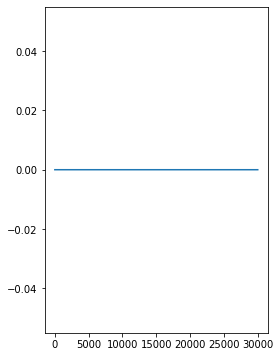

In [79]:
plt.figure(figsize=(4,6))
plt.plot(hvc_data_knn["loc_ic_t2o_mou"])
plt.show()

In [80]:
hvc_data_knn.drop(columns=["std_og_t2c_mou_6",
"std_og_t2c_mou_7",
"std_og_t2c_mou_8",
"std_og_t2c_mou_9",
"std_ic_t2o_mou_6",
"std_ic_t2o_mou_7",
"std_ic_t2o_mou_8",
"std_ic_t2o_mou_9",
"loc_og_t2o_mou",
"std_og_t2o_mou",
"loc_ic_t2o_mou"], inplace=True)  ## Since all these columns have only 0 value.They play no role in deciding churn

In [81]:
hvc_data_knn.circle_id.value_counts(normalize=True)

109.0    1.0
Name: circle_id, dtype: float64

In [82]:
hvc_data_knn.drop(columns=["circle_id"],inplace=True)

In [83]:
## There are no categorical variables in the data. Hence no dummies need to be created

In [84]:
## removing all 9th month data

In [85]:
for item in hvc_data_knn.columns:
    print(item)

arpu_6
arpu_7
arpu_8
arpu_9
onnet_mou_6
onnet_mou_7
onnet_mou_8
onnet_mou_9
offnet_mou_6
offnet_mou_7
offnet_mou_8
offnet_mou_9
roam_ic_mou_6
roam_ic_mou_7
roam_ic_mou_8
roam_ic_mou_9
roam_og_mou_6
roam_og_mou_7
roam_og_mou_8
roam_og_mou_9
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2t_mou_8
loc_og_t2t_mou_9
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2m_mou_8
loc_og_t2m_mou_9
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2f_mou_9
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_t2c_mou_9
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
loc_og_mou_9
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2t_mou_8
std_og_t2t_mou_9
std_og_t2m_mou_6
std_og_t2m_mou_7
std_og_t2m_mou_8
std_og_t2m_mou_9
std_og_t2f_mou_6
std_og_t2f_mou_7
std_og_t2f_mou_8
std_og_t2f_mou_9
std_og_mou_6
std_og_mou_7
std_og_mou_8
std_og_mou_9
isd_og_mou_6
isd_og_mou_7
isd_og_mou_8
isd_og_mou_9
spl_og_mou_6
spl_og_mou_7
spl_og_mou_8
spl_og_mou_9
og_others_6
og_others_7
og_others_8
og_others_9
total_og_mou_6
total_og_mou_

In [86]:
hvc_data_knn.drop(columns=["arpu_9","onnet_mou_9","offnet_mou_9","roam_ic_mou_9","roam_og_mou_9","loc_og_t2t_mou_9","loc_og_t2m_mou_9","loc_og_t2f_mou_9","loc_og_t2c_mou_9","loc_og_mou_9","std_og_t2t_mou_9","std_og_t2m_mou_9","std_og_t2f_mou_9","std_og_mou_9","isd_og_mou_9","spl_og_mou_9","og_others_9","total_og_mou_9","loc_ic_t2t_mou_9","loc_ic_t2m_mou_9","loc_ic_t2f_mou_9","loc_ic_mou_9","std_ic_t2t_mou_9","std_ic_t2m_mou_9","std_ic_t2f_mou_9","std_ic_mou_9","total_ic_mou_9","spl_ic_mou_9","isd_ic_mou_9","ic_others_9","total_rech_num_9","total_rech_amt_9","max_rech_amt_9","last_day_rch_amt_9","total_rech_data_9","max_rech_data_9","count_rech_2g_9","count_rech_3g_9","av_rech_amt_data_9","vol_2g_mb_9","vol_3g_mb_9","arpu_3g_9","arpu_2g_9","night_pck_user_9","monthly_2g_9","sachet_2g_9","monthly_3g_9","sachet_3g_9","fb_user_9"],inplace=True)

In [87]:
for item in hvc_data_knn.columns:
    print(item)

arpu_6
arpu_7
arpu_8
onnet_mou_6
onnet_mou_7
onnet_mou_8
offnet_mou_6
offnet_mou_7
offnet_mou_8
roam_ic_mou_6
roam_ic_mou_7
roam_ic_mou_8
roam_og_mou_6
roam_og_mou_7
roam_og_mou_8
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2t_mou_8
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2m_mou_8
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2t_mou_8
std_og_t2m_mou_6
std_og_t2m_mou_7
std_og_t2m_mou_8
std_og_t2f_mou_6
std_og_t2f_mou_7
std_og_t2f_mou_8
std_og_mou_6
std_og_mou_7
std_og_mou_8
isd_og_mou_6
isd_og_mou_7
isd_og_mou_8
spl_og_mou_6
spl_og_mou_7
spl_og_mou_8
og_others_6
og_others_7
og_others_8
total_og_mou_6
total_og_mou_7
total_og_mou_8
loc_ic_t2t_mou_6
loc_ic_t2t_mou_7
loc_ic_t2t_mou_8
loc_ic_t2m_mou_6
loc_ic_t2m_mou_7
loc_ic_t2m_mou_8
loc_ic_t2f_mou_6
loc_ic_t2f_mou_7
loc_ic_t2f_mou_8
loc_ic_mou_6
loc_ic_mou_7
loc_ic_mou_8
std_ic_t2t_mou_6
std_ic_t2t_mou_7


In [88]:
hvc_data_knn.drop(columns="sep_vbc_3g", inplace=True)

In [89]:
## Dividing the dataframe into train and test.
## Applying Robust Scaler method to scale the data and take care of outliers


In [90]:
from sklearn.model_selection import train_test_split

In [91]:
train_data, test_data= train_test_split(hvc_data_knn, train_size=0.7, random_state=100)

In [92]:
train_data.shape

(21007, 153)

In [93]:
test_data.shape

(9004, 153)

In [94]:
hvc_data_knn.shape

(30011, 153)

In [95]:
y_train=train_data.pop("churn")
X_train=train_data.copy()
y_test=test_data.pop("churn")
X_test=test_data.copy()

In [96]:
print(y_train.shape,X_train.shape,y_test.shape,X_test.shape)

(21007,) (21007, 152) (9004,) (9004, 152)


In [97]:
from sklearn import preprocessing

In [98]:
scaler=preprocessing.RobustScaler() 
robust_train = scaler.fit_transform(X_train)
robust_train = pd.DataFrame(robust_train)
robust_train.columns=X_train.columns

In [99]:
robust_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,days_since_last_rech_in_last_3_months
0,-0.484311,-0.037841,-0.169946,0.670977,1.364811,1.186585,-0.332381,-0.531957,-0.399759,0.0,0.0,0.0,0.0,0.0,0.0,-0.384847,-0.367554,-0.263728,-0.481878,-0.506736,-0.451733,-0.077519,-0.084428,-0.062112,906.0,0.0,0.0,-0.510007,-0.528601,-0.456219,1.786368,2.793224,3.019136,0.416663,0.110563,0.376773,0.0,0.00,0.0,0.588194,0.802030,0.903403,0.00,0.00,0.00,6.128599,0.896936,0.336649,0.0,0.0,0.0,-0.026588,0.169210,0.126248,-0.418686,-0.350054,-0.400413,-0.500793,-0.464417,-0.519140,-0.164948,-0.177812,-0.169477,-0.542275,-0.499064,-0.547833,6.714902,5.775382,6.907055,1.271646,1.837517,4.029249,0.0,0.000000,0.000000,2.168189,2.301312,3.752710,-0.267352,-0.186476,-0.054939,0.15,0.0,0.0,0.00,0.00,0.00,0.000000,0.000000,0.000,1.111111,1.666667,1.888889,-0.530210,-0.067797,-0.144033,-1.000000,-0.644444,-0.610687,-1.222222,-0.689320,-0.307692,0.0,1.0,0.0,0.0,0.173469,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.110390,0.000000,0.0,14.615917,0.00000,0.0,0.000000,0.00,0.0,0.00,0.0,0.0,0.026087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.391096,0.000000,0.000000,0.00,-0.6
1,-0.517443,0.046103,0.073535,-0.051439,-0.308469,0.110015,-0.160466,-0.413338,-0.187918,0.0,0.0,0.0,0.0,0.0,0.0,0.930993,-0.070279,1.296981,0.432384,-0.101042,0.093493,4.329457,5.621013,11.403727,0.0,0.0,0.0,0.489962,-0.092407,0.474320,-0.074707,-0.071842,-0.051274,-0.183241,-0.169305,-0.152139,0.0,0.00,0.0,-0.225451,-0.218740,-0.158960,0.00,0.00,0.00,1.094050,0.302228,0.428462,0.0,0.0,0.0,-0.284731,-0.573651,-0.209892,-0.145577,-0.284967,0.171084,2.271953,0.835465,0.927846,7.341792,2.750000,13.983980,1.704458,0.512818,1.222465,0.252995,0.146451,-0.085106,-0.269045,-0.267085,-0.240711,0.0,3.500000,1.895735,-0.257518,-0.260997,-0.299226,1.321483,0.303964,0.887962,0.00,0.0

In [100]:
robust_test=scaler.transform(X_test)

In [101]:
robust_test = pd.DataFrame(robust_test)
robust_test.columns=X_test.columns
robust_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,days_since_last_rech_in_last_3_months
0,1.056576,-0.467591,-1.174455,-0.333828,-0.288224,-0.360240,4.246502,0.698393,-0.617180,0.0,0.00,0.00,0.0,0.0,0.00,-0.198094,-0.219039,-0.349981,0.064327,-0.188465,-0.453894,0.174419,0.671670,-0.062112,90.0,0.0,0.0,-0.104881,-0.271437,-0.479584,-0.046179,0.023318,-0.042039,8.476696,2.025640,-0.131174,0.00,0.0,0.0,2.958426,0.606574,-0.149058,0.0,0.0,0.0,0.898273,0.250696,0.290742,4.06,0.0,0.0,2.256517,0.103931,-0.662594,0.338405,0.686259,-0.083796,0.419794,0.438721,0.358884,0.160983,1.650456,0.708263,0.266218,0.447120,0.155189,-0.106373,-0.116801,0.537514,2.008175,0.861925,1.546245,0.000000,0.000000,0.000000,1.024059,0.336798,0.901013,0.254571,0.301566,0.133311,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.000,2.333333,0.000000,-0.888889,1.050555,-0.549637,-1.069959,0.000000,-0.200000,-0.992366,-0.922222,-0.883495,-0.384615,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.00,0.00,0.00,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.260959,0.000000,0.000000,0.00,5.4
1,0.540856,0.477330,-0.717265,3.212478,3.785000,0.581850,0.434847,0.141551,-0.443909,0.0,0.51,1.14,0.0,1.0,4.29,0.181325,0.033792,0.102943,-0.463780,-0.394827,-0.450627,-0.077519,-0.084428,-0.062112,186.0,0.0,0.0,-0.352686,-0.352019,-0.361979,5.943720,6.588004,1.568452,1.779957,1.219092,0.181663,0.05,0.0,0.0,2.414303,2.421172,0.420430,0.0,0.0,0.0,7.180422,0.745125,2.050497,0.00,0.0,0.0,1.690481,1.749411,-0.167555,0.372811,-0.393137,-0.426599,-0.393421,-0.369225,-0.537666,-0.164948,-0.177812,-0.169477,-0.273059,-0.448381,-0.566720,10.941064,7.496855,0.198208,3.409513,4.264296,0.189328,0.000000,7.535714,0.000000,4.432390,4.209764,0.010721,0.306320,0.159294,-0.588251,0.00,0.0,

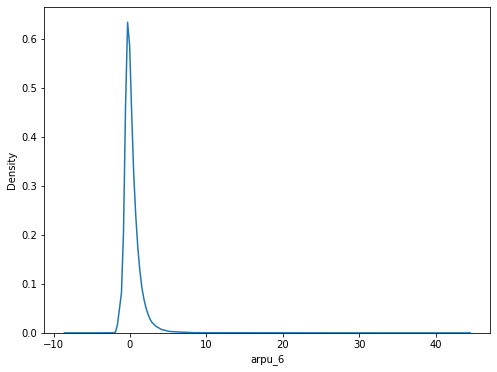

In [102]:
plt.figure(figsize=(8,6))
sns.kdeplot(robust_train["arpu_6"])  ## We can see robust scaler has handled outliers through IQR method and produced a normal distribution
plt.show()

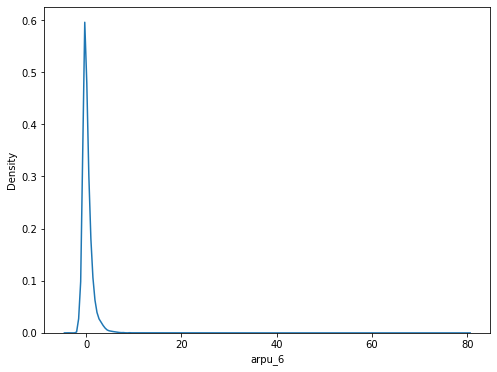

In [103]:
plt.figure(figsize=(8,6))
sns.kdeplot(robust_test["arpu_6"])  ## We can see robust scaler has handled outliers through IQR method and produced a normal distribution
plt.show()

In [104]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=0)
X_over,y_over=smote.fit_resample(robust_train, y_train)



## Modelling-
### Without PCA: Highly Interpretable : Logistic Regression on RFE and Decision Tree using GridSearchCV
### With PCA : Randomforest- classifier, XGBoost 

In [105]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [106]:
from sklearn.feature_selection import RFE
rfe=RFE(logreg,35)
rfe=rfe.fit(X_over,y_over)

In [107]:
print(X_over.shape)
print(y_over.shape)
rfe.support_

(38368, 152)
(38368,)


array([False, False, False,  True,  True, False,  True, False,  True,
       False, False, False, False, False, False,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [108]:
X_over=pd.DataFrame(X_over)
X_over.columns=robust_train.columns
X_over.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,days_since_last_rech_in_last_3_months
0,-0.484311,-0.037841,-0.169946,0.670977,1.364811,1.186585,-0.332381,-0.531957,-0.399759,0.0,0.0,0.0,0.0,0.0,0.0,-0.384847,-0.367554,-0.263728,-0.481878,-0.506736,-0.451733,-0.077519,-0.084428,-0.062112,906.0,0.0,0.0,-0.510007,-0.528601,-0.456219,1.786368,2.793224,3.019136,0.416663,0.110563,0.376773,0.0,0.00,0.0,0.588194,0.802030,0.903403,0.00,0.00,0.00,6.128599,0.896936,0.336649,0.0,0.0,0.0,-0.026588,0.169210,0.126248,-0.418686,-0.350054,-0.400413,-0.500793,-0.464417,-0.519140,-0.164948,-0.177812,-0.169477,-0.542275,-0.499064,-0.547833,6.714902,5.775382,6.907055,1.271646,1.837517,4.029249,0.0,0.000000,0.000000,2.168189,2.301312,3.752710,-0.267352,-0.186476,-0.054939,0.15,0.0,0.0,0.00,0.00,0.00,0.000000,0.000000,0.000,1.111111,1.666667,1.888889,-0.530210,-0.067797,-0.144033,-1.000000,-0.644444,-0.610687,-1.222222,-0.689320,-0.307692,0.0,1.0,0.0,0.0,0.173469,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.110390,0.000000,0.0,14.615917,0.00000,0.0,0.000000,0.00,0.0,0.00,0.0,0.0,0.026087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.391096,0.000000,0.000000,0.00,-0.6
1,-0.517443,0.046103,0.073535,-0.051439,-0.308469,0.110015,-0.160466,-0.413338,-0.187918,0.0,0.0,0.0,0.0,0.0,0.0,0.930993,-0.070279,1.296981,0.432384,-0.101042,0.093493,4.329457,5.621013,11.403727,0.0,0.0,0.0,0.489962,-0.092407,0.474320,-0.074707,-0.071842,-0.051274,-0.183241,-0.169305,-0.152139,0.0,0.00,0.0,-0.225451,-0.218740,-0.158960,0.00,0.00,0.00,1.094050,0.302228,0.428462,0.0,0.0,0.0,-0.284731,-0.573651,-0.209892,-0.145577,-0.284967,0.171084,2.271953,0.835465,0.927846,7.341792,2.750000,13.983980,1.704458,0.512818,1.222465,0.252995,0.146451,-0.085106,-0.269045,-0.267085,-0.240711,0.0,3.500000,1.895735,-0.257518,-0.260997,-0.299226,1.321483,0.303964,0.887962,0.00,0.0

In [109]:
cols=X_over.columns[rfe.support_]
X_train=X_over[cols]

In [110]:
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, recall_score, precision_score,precision_recall_curve

In [111]:
X_train.columns

Index(['onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8',
       'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_mou_6',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6',
       'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_7', 'spl_ic_mou_8',
       'total_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_8',
       'night_pck_user_6', 'monthly_2g_6', 'monthly_2g_8', 'monthly_3g_8',
       'fb_user_8', 'aon', 'days_since_last_rech_in_last_3_months'],
      dtype='object')

In [112]:
X_train_sm=sm.add_constant(X_train)

logm1=sm.GLM(y_over, X_train_sm, family=sm.families.Binomial() )

In [113]:
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38332
Model Family:                Binomial   Df Model:                           35
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14121.
Date:                Mon, 30 Nov 2020   Deviance:                       28241.
Time:                        08:25:53   Pearson chi2:                 2.92e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.4306      0.187    -18.347      0.000      -3.797      -3.064
onnet_mou_6                              -0.2692      0.099     -2.709      0.007      -0.464      -0.074
onnet_mou_7                               0.9153      0.105      8.742      0.000       0.710       1.121
offnet_mou_6                              0.6695      0.098      6.821      0.000       0.477       0.862
offnet_mou_8                              0.4764      0.092      5.193      0.000       0.297       0.656
loc_og_t2t_mou_6                          0.0818      0.071      1.153      0.249      -0.057       0.221
loc_og_t2t_mou_7                         -0.1842      0.037     -4.946      0.000      -0.257      -0.111
loc_og_t2t_mou_8                         -0.2014      0.046     -4.420      0.000      -0.291      -0.112
loc_og_t2m_mou_6                         -0.6633      0.144     -4.622      0.000      -0.945      -0.382
loc_og_mou_6                              0.9020      0.252      3.585      0.000       0.409       1.395
loc_og_mou_7                             -0.1991      0.205     -0.972      0.331      -0.600       0.202
loc_og_mou_8                              3.0153      0.241     12.522      0.000       2.543       3.487
std_og_t2t_mou_6                          0.4963      0.090      5.539      0.000       0.321       0.672
std_og_t2t_mou_7                         -0.7411      0.140     -5.299      0.000      -1.015      -0.467
std_og_t2t_mou_8                          1.6420      0.103     16.003      0.000       1.441       1.843
std_og_t2m_mou_7                         -0.1157      0.138     -0.841      0.401      -0.386       0.154
std_og_t2m_mou_8                          1.7096      0.125     13.691      0.000       1.465       1.954
std_og_mou_6                              0.4406      0.266      1.656      0.098      -0.081       0.962
total_og_mou_6                           -1.3412      0.278     -4.831      0.000      -1.885      -0.797
total_og_mou_7                            0.7237      0.409      1.769      0.077      -0.078       1.526
total_og_mou_8                           -8.5105      0.480    -17.729      0.000      -9.451      -7.570
total_ic_mou_6                            0.2011      0.032      6.228      0.000       0.138       0.264
total_ic_mou_7                            0.3639      0.039      9.314      0.000       0.287       0.440
total_ic_mou_8                           -1.4961      0.056    -26.578      0.000      -1.606      -1.386
spl_ic_mou_7                             -0.7139      0.195     -3.664      0.000      -1.096      -0.332
spl_ic_mou_8                             -3.0384      0.214    -14.192      0.000      -3.458      -2.619
total_rec

In the following logistic regression analysis, we will be dropping the feature which has either no significant statistical relationship with dependent variable or it has vif value more than 5

In [114]:
X_train.drop(columns="std_og_t2m_mou_7", inplace=True)
X_train_sm=sm.add_constant(X_train)
logm2=sm.GLM(y_over, X_train_sm, family=sm.families.Binomial() )

In [115]:
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38333
Model Family:                Binomial   Df Model:                           34
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14121.
Date:                Mon, 30 Nov 2020   Deviance:                       28242.
Time:                        08:25:58   Pearson chi2:                 2.91e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.4976      0.170    -20.623      0.000      -3.830      -3.165
onnet_mou_6                              -0.2706      0.099     -2.724      0.006      -0.465      -0.076
onnet_mou_7                               0.9103      0.104      8.711      0.000       0.705       1.115
offnet_mou_6                              0.6736      0.098      6.864      0.000       0.481       0.866
offnet_mou_8                              0.4772      0.092      5.199      0.000       0.297       0.657
loc_og_t2t_mou_6                          0.0693      0.069      0.998      0.318      -0.067       0.205
loc_og_t2t_mou_7                         -0.1833      0.037     -4.925      0.000      -0.256      -0.110
loc_og_t2t_mou_8                         -0.2009      0.046     -4.410      0.000      -0.290      -0.112
loc_og_t2m_mou_6                         -0.6994      0.137     -5.096      0.000      -0.968      -0.430
loc_og_mou_6                              0.9208      0.251      3.674      0.000       0.430       1.412
loc_og_mou_7                             -0.0350      0.062     -0.565      0.572      -0.157       0.086
loc_og_mou_8                              2.9376      0.222     13.242      0.000       2.503       3.372
std_og_t2t_mou_6                          0.4996      0.090      5.579      0.000       0.324       0.675
std_og_t2t_mou_7                         -0.6366      0.064     -9.953      0.000      -0.762      -0.511
std_og_t2t_mou_8                          1.6085      0.094     17.063      0.000       1.424       1.793
std_og_t2m_mou_8                          1.6679      0.114     14.587      0.000       1.444       1.892
std_og_mou_6                              0.3798      0.253      1.503      0.133      -0.115       0.875
total_og_mou_6                           -1.2822      0.263     -4.873      0.000      -1.798      -0.766
total_og_mou_7                            0.3822      0.049      7.823      0.000       0.286       0.478
total_og_mou_8                           -8.3527      0.440    -18.963      0.000      -9.216      -7.489
total_ic_mou_6                            0.2012      0.032      6.240      0.000       0.138       0.264
total_ic_mou_7                            0.3656      0.039      9.369      0.000       0.289       0.442
total_ic_mou_8                           -1.4979      0.056    -26.627      0.000      -1.608      -1.388
spl_ic_mou_7                             -0.7128      0.195     -3.658      0.000      -1.095      -0.331
spl_ic_mou_8                             -3.0397      0.214    -14.196      0.000      -3.459      -2.620
total_rech_amt_7                          0.2455      0.020     12.432      0.000       0.207       0.284
max_rech_

In [116]:
X_train.drop(columns="loc_og_mou_7", inplace=True)
X_train_sm=sm.add_constant(X_train)
logm3=sm.GLM(y_over, X_train_sm, family=sm.families.Binomial() )
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38334
Model Family:                Binomial   Df Model:                           33
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14121.
Date:                Mon, 30 Nov 2020   Deviance:                       28242.
Time:                        08:26:01   Pearson chi2:                 2.90e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.5033      0.169    -20.685      0.000      -3.835      -3.171
onnet_mou_6                              -0.2708      0.099     -2.726      0.006      -0.466      -0.076
onnet_mou_7                               0.9108      0.104      8.716      0.000       0.706       1.116
offnet_mou_6                              0.6742      0.098      6.874      0.000       0.482       0.866
offnet_mou_8                              0.4774      0.092      5.199      0.000       0.297       0.657
loc_og_t2t_mou_6                          0.0744      0.069      1.081      0.280      -0.061       0.209
loc_og_t2t_mou_7                         -0.1921      0.034     -5.680      0.000      -0.258      -0.126
loc_og_t2t_mou_8                         -0.1949      0.044     -4.399      0.000      -0.282      -0.108
loc_og_t2m_mou_6                         -0.6956      0.137     -5.076      0.000      -0.964      -0.427
loc_og_mou_6                              0.9026      0.248      3.634      0.000       0.416       1.389
loc_og_mou_8                              2.9166      0.219     13.333      0.000       2.488       3.345
std_og_t2t_mou_6                          0.4987      0.090      5.571      0.000       0.323       0.674
std_og_t2t_mou_7                         -0.6336      0.064     -9.941      0.000      -0.758      -0.509
std_og_t2t_mou_8                          1.6089      0.094     17.063      0.000       1.424       1.794
std_og_t2m_mou_8                          1.6704      0.114     14.616      0.000       1.446       1.894
std_og_mou_6                              0.3824      0.252      1.514      0.130      -0.112       0.877
total_og_mou_6                           -1.2820      0.263     -4.875      0.000      -1.798      -0.767
total_og_mou_7                            0.3717      0.045      8.247      0.000       0.283       0.460
total_og_mou_8                           -8.3543      0.441    -18.963      0.000      -9.218      -7.491
total_ic_mou_6                            0.2039      0.032      6.390      0.000       0.141       0.266
total_ic_mou_7                            0.3599      0.038      9.560      0.000       0.286       0.434
total_ic_mou_8                           -1.4942      0.056    -26.760      0.000      -1.604      -1.385
spl_ic_mou_7                             -0.7145      0.195     -3.665      0.000      -1.097      -0.332
spl_ic_mou_8                             -3.0394      0.214    -14.194      0.000      -3.459      -2.620
total_rech_amt_7                          0.2451      0.020     12.425      0.000       0.206       0.284
max_rech_amt_8                            0.1688      0.019      8.789      0.000       0.131       0.206
last_day_

In [117]:

X_train.drop(columns="loc_og_t2t_mou_6", inplace=True)
X_train_sm=sm.add_constant(X_train)
logm=sm.GLM(y_over, X_train_sm, family=sm.families.Binomial() )
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38335
Model Family:                Binomial   Df Model:                           32
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14122.
Date:                Mon, 30 Nov 2020   Deviance:                       28243.
Time:                        08:26:03   Pearson chi2:                 2.95e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.5136      0.170    -20.719      0.000      -3.846      -3.181
onnet_mou_6                              -0.2140      0.085     -2.521      0.012      -0.380      -0.048
onnet_mou_7                               0.8940      0.103      8.639      0.000       0.691       1.097
offnet_mou_6                              0.6207      0.084      7.421      0.000       0.457       0.785
offnet_mou_8                              0.4819      0.092      5.255      0.000       0.302       0.662
loc_og_t2t_mou_7                         -0.1856      0.033     -5.573      0.000      -0.251      -0.120
loc_og_t2t_mou_8                         -0.1926      0.044     -4.351      0.000      -0.279      -0.106
loc_og_t2m_mou_6                         -0.8081      0.087     -9.270      0.000      -0.979      -0.637
loc_og_mou_6                              1.1045      0.161      6.872      0.000       0.789       1.419
loc_og_mou_8                              2.9636      0.215     13.780      0.000       2.542       3.385
std_og_t2t_mou_6                          0.4407      0.072      6.162      0.000       0.301       0.581
std_og_t2t_mou_7                         -0.6233      0.063     -9.876      0.000      -0.747      -0.500
std_og_t2t_mou_8                          1.6334      0.092     17.779      0.000       1.453       1.813
std_og_t2m_mou_8                          1.6985      0.112     15.208      0.000       1.480       1.917
std_og_mou_6                              0.4302      0.246      1.750      0.080      -0.052       0.912
total_og_mou_6                           -1.2459      0.257     -4.847      0.000      -1.750      -0.742
total_og_mou_7                            0.3685      0.045      8.201      0.000       0.280       0.457
total_og_mou_8                           -8.4678      0.430    -19.713      0.000      -9.310      -7.626
total_ic_mou_6                            0.2026      0.032      6.361      0.000       0.140       0.265
total_ic_mou_7                            0.3594      0.038      9.566      0.000       0.286       0.433
total_ic_mou_8                           -1.4914      0.056    -26.760      0.000      -1.601      -1.382
spl_ic_mou_7                             -0.7124      0.195     -3.654      0.000      -1.094      -0.330
spl_ic_mou_8                             -3.0378      0.214    -14.188      0.000      -3.457      -2.618
total_rech_amt_7                          0.2465      0.020     12.505      0.000       0.208       0.285
max_rech_amt_8                            0.1679      0.019      8.752      0.000       0.130       0.206
last_day_rch_amt_8                       -0.5709      0.025    -22.868      0.000      -0.620      -0.522
night_pck

In [118]:
X_train.drop(columns="std_og_mou_6", inplace=True)
X_train_sm=sm.add_constant(X_train)
logm=sm.GLM(y_over, X_train_sm, family=sm.families.Binomial() )
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38336
Model Family:                Binomial   Df Model:                           31
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14123.
Date:                Mon, 30 Nov 2020   Deviance:                       28247.
Time:                        08:26:05   Pearson chi2:                 3.03e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.4735      0.166    -20.868      0.000      -3.800      -3.147
onnet_mou_6                              -0.2363      0.084     -2.812      0.005      -0.401      -0.072
onnet_mou_7                               0.8974      0.103      8.679      0.000       0.695       1.100
offnet_mou_6                              0.6845      0.075      9.119      0.000       0.537       0.832
offnet_mou_8                              0.4611      0.091      5.085      0.000       0.283       0.639
loc_og_t2t_mou_7                         -0.1866      0.033     -5.607      0.000      -0.252      -0.121
loc_og_t2t_mou_8                         -0.1958      0.044     -4.431      0.000      -0.282      -0.109
loc_og_t2m_mou_6                         -0.8580      0.082    -10.405      0.000      -1.020      -0.696
loc_og_mou_6                              0.9384      0.121      7.739      0.000       0.701       1.176
loc_og_mou_8                              3.0824      0.205     15.013      0.000       2.680       3.485
std_og_t2t_mou_6                          0.4852      0.067      7.254      0.000       0.354       0.616
std_og_t2t_mou_7                         -0.6257      0.063     -9.928      0.000      -0.749      -0.502
std_og_t2t_mou_8                          1.6803      0.088     19.023      0.000       1.507       1.853
std_og_t2m_mou_8                          1.7649      0.106     16.679      0.000       1.557       1.972
total_og_mou_6                           -0.8780      0.124     -7.094      0.000      -1.121      -0.635
total_og_mou_7                            0.3742      0.045      8.354      0.000       0.286       0.462
total_og_mou_8                           -8.6866      0.413    -21.034      0.000      -9.496      -7.877
total_ic_mou_6                            0.1993      0.032      6.276      0.000       0.137       0.262
total_ic_mou_7                            0.3594      0.038      9.572      0.000       0.286       0.433
total_ic_mou_8                           -1.4886      0.056    -26.741      0.000      -1.598      -1.380
spl_ic_mou_7                             -0.7190      0.195     -3.688      0.000      -1.101      -0.337
spl_ic_mou_8                             -3.0512      0.214    -14.246      0.000      -3.471      -2.631
total_rech_amt_7                          0.2453      0.020     12.509      0.000       0.207       0.284
max_rech_amt_8                            0.1676      0.019      8.752      0.000       0.130       0.205
last_day_rch_amt_8                       -0.5713      0.025    -22.911      0.000      -0.620      -0.522
night_pck_user_6                          0.5373      0.149      3.597      0.000       0.245       0.830
monthly_2

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def variance_inflation_table(X_train):
    vif=pd.DataFrame()
    vif["Features"]=X_train.columns
    vif["VIF"]=[variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif["VIF"]=round(vif["VIF"],2)
    vif=vif.sort_values(by="VIF", ascending=False)
    return vif

In [120]:
variance_inflation_table(X_train)

,Features,VIF
9,std_og_t2t_mou_6,122.45
1,onnet_mou_7,100.96
10,std_og_t2t_mou_7,93.92
0,onnet_mou_6,74.80
7,loc_og_mou_6,61.44
13,total_og_mou_6,59.25
15,total_og_mou_8,58.76
3,offnet_mou_8,37.24
2,offnet_mou_6,30.24
6,loc_og_t2m_mou_6,28.96


In [121]:
X_train.drop(columns="std_og_t2t_mou_6", inplace=True)
X_train_sm=sm.add_constant(X_train)
logm=sm.GLM(y_over, X_train_sm, family=sm.families.Binomial() )
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38337
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14149.
Date:                Mon, 30 Nov 2020   Deviance:                       28297.
Time:                        08:26:14   Pearson chi2:                 2.77e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.1725      0.162    -19.559      0.000      -3.490      -2.855
onnet_mou_6                               0.2871      0.048      6.028      0.000       0.194       0.380
onnet_mou_7                               0.7203      0.103      7.000      0.000       0.519       0.922
offnet_mou_6                              0.3257      0.056      5.827      0.000       0.216       0.435
offnet_mou_8                              0.5677      0.091      6.247      0.000       0.390       0.746
loc_og_t2t_mou_7                         -0.1501      0.034     -4.471      0.000      -0.216      -0.084
loc_og_t2t_mou_8                         -0.1893      0.044     -4.263      0.000      -0.276      -0.102
loc_og_t2m_mou_6                         -0.3436      0.045     -7.660      0.000      -0.431      -0.256
loc_og_mou_6                              0.1324      0.054      2.468      0.014       0.027       0.238
loc_og_mou_8                              2.9347      0.208     14.130      0.000       2.528       3.342
std_og_t2t_mou_7                         -0.5165      0.063     -8.217      0.000      -0.640      -0.393
std_og_t2t_mou_8                          1.6457      0.089     18.435      0.000       1.471       1.821
std_og_t2m_mou_8                          1.6684      0.107     15.597      0.000       1.459       1.878
total_og_mou_6                           -0.2687      0.090     -2.977      0.003      -0.446      -0.092
total_og_mou_7                            0.3770      0.045      8.405      0.000       0.289       0.465
total_og_mou_8                           -8.5027      0.417    -20.380      0.000      -9.320      -7.685
total_ic_mou_6                            0.2032      0.032      6.384      0.000       0.141       0.266
total_ic_mou_7                            0.3554      0.038      9.439      0.000       0.282       0.429
total_ic_mou_8                           -1.4895      0.056    -26.702      0.000      -1.599      -1.380
spl_ic_mou_7                             -0.7415      0.195     -3.807      0.000      -1.123      -0.360
spl_ic_mou_8                             -3.0533      0.214    -14.275      0.000      -3.473      -2.634
total_rech_amt_7                          0.2512      0.020     12.684      0.000       0.212       0.290
max_rech_amt_8                            0.1745      0.019      9.102      0.000       0.137       0.212
last_day_rch_amt_8                       -0.5690      0.025    -22.815      0.000      -0.618      -0.520
night_pck_user_6                          0.5261      0.149      3.526      0.000       0.234       0.818
monthly_2g_6                             -0.5656      0.066     -8.621      0.000      -0.694      -0.437
monthly_2

In [122]:

variance_inflation_table(X_train)

,Features,VIF
1,onnet_mou_7,89.44
9,std_og_t2t_mou_7,82.41
14,total_og_mou_8,44.24
3,offnet_mou_8,35.66
12,total_og_mou_6,30.18
11,std_og_t2m_mou_8,23.75
8,loc_og_mou_8,21.94
4,loc_og_t2t_mou_7,20.19
10,std_og_t2t_mou_8,19.48
0,onnet_mou_6,18.42


In [123]:
X_train.drop(columns="onnet_mou_7", inplace=True)
X_train_sm=sm.add_constant(X_train)
logm=sm.GLM(y_over, X_train_sm, family=sm.families.Binomial() )
logm.fit().summary()
variance_inflation_table(X_train)

,Features,VIF
2,offnet_mou_8,35.44
13,total_og_mou_8,33.57
11,total_og_mou_6,27.26
10,std_og_t2m_mou_8,18.11
7,loc_og_mou_8,17.83
0,onnet_mou_6,16.10
9,std_og_t2t_mou_8,16.03
1,offnet_mou_6,14.90
4,loc_og_t2t_mou_8,12.59
8,std_og_t2t_mou_7,7.70


In [124]:
X_train.drop(columns="offnet_mou_8", inplace=True)
X_train_sm=sm.add_constant(X_train)
logm=sm.GLM(y_over, X_train_sm, family=sm.families.Binomial() )
logm.fit().summary()
variance_inflation_table(X_train)

,Features,VIF
10,total_og_mou_6,25.36
12,total_og_mou_8,22.84
0,onnet_mou_6,15.13
1,offnet_mou_6,13.48
8,std_og_t2t_mou_8,11.49
6,loc_og_mou_8,10.68
7,std_og_t2t_mou_7,7.69
9,std_og_t2m_mou_8,7.44
5,loc_og_mou_6,7.20
11,total_og_mou_7,6.45


In [125]:
X_train.drop(columns="total_og_mou_6", inplace=True)
X_train_sm=sm.add_constant(X_train)
logm=sm.GLM(y_over, X_train_sm, family=sm.families.Binomial() )
logm.fit().summary()
variance_inflation_table(X_train)

,Features,VIF
11,total_og_mou_8,18.67
8,std_og_t2t_mou_8,9.70
6,loc_og_mou_8,9.41
7,std_og_t2t_mou_7,7.69
5,loc_og_mou_6,7.18
10,total_og_mou_7,6.28
9,std_og_t2m_mou_8,5.84
4,loc_og_t2m_mou_6,5.83
3,loc_og_t2t_mou_8,5.30
2,loc_og_t2t_mou_7,4.57


In [126]:
X_train.drop(columns="total_og_mou_8", inplace=True)
X_train_sm=sm.add_constant(X_train)
logm=sm.GLM(y_over, X_train_sm, family=sm.families.Binomial() )
logm.fit().summary()
variance_inflation_table(X_train)

,Features,VIF
5,loc_og_mou_6,7.12
7,std_og_t2t_mou_7,6.77
4,loc_og_t2m_mou_6,5.76
10,total_og_mou_7,5.38
3,loc_og_t2t_mou_8,5.30
6,loc_og_mou_8,5.24
2,loc_og_t2t_mou_7,4.32
12,total_ic_mou_7,3.44
13,total_ic_mou_8,3.11
0,onnet_mou_6,2.95


In [127]:
X_train.drop(columns="loc_og_mou_6", inplace=True)
X_train_sm=sm.add_constant(X_train)
logm=sm.GLM(y_over, X_train_sm, family=sm.families.Binomial() )
logm.fit().summary()
variance_inflation_table(X_train)

,Features,VIF
6,std_og_t2t_mou_7,6.36
9,total_og_mou_7,5.38
3,loc_og_t2t_mou_8,5.28
5,loc_og_mou_8,5.24
2,loc_og_t2t_mou_7,3.65
11,total_ic_mou_7,3.44
12,total_ic_mou_8,3.11
10,total_ic_mou_6,2.66
7,std_og_t2t_mou_8,2.54
0,onnet_mou_6,2.44


In [128]:
X_train.drop(columns="std_og_t2t_mou_7", inplace=True)
X_train_sm=sm.add_constant(X_train)
logm=sm.GLM(y_over, X_train_sm, family=sm.families.Binomial() )
logm.fit().summary()
variance_inflation_table(X_train)

,Features,VIF
3,loc_og_t2t_mou_8,5.20
5,loc_og_mou_8,5.05
10,total_ic_mou_7,3.43
8,total_og_mou_7,3.31
2,loc_og_t2t_mou_7,3.27
11,total_ic_mou_8,3.11
9,total_ic_mou_6,2.66
15,max_rech_amt_8,2.36
4,loc_og_t2m_mou_6,2.22
21,fb_user_8,2.17


In [129]:
X_train.drop(columns="loc_og_t2t_mou_8", inplace=True)
X_train_sm=sm.add_constant(X_train)
logm=sm.GLM(y_over, X_train_sm, family=sm.families.Binomial() )
print(logm.fit().summary())
variance_inflation_table(X_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38344
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14565.
Date:                Mon, 30 Nov 2020   Deviance:                       29130.
Time:                        08:26:45   Pearson chi2:                 5.23e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

,Features,VIF
9,total_ic_mou_7,3.43
7,total_og_mou_7,3.24
10,total_ic_mou_8,3.08
4,loc_og_mou_8,2.88
8,total_ic_mou_6,2.64
14,max_rech_amt_8,2.36
20,fb_user_8,2.17
15,last_day_rch_amt_8,2.11
2,loc_og_t2t_mou_7,2.04
3,loc_og_t2m_mou_6,2.01


In [130]:
X_train.drop(columns="loc_og_t2t_mou_7", inplace=True)
X_train_sm=sm.add_constant(X_train)
logm=sm.GLM(y_over, X_train_sm, family=sm.families.Binomial() )
print(logm.fit().summary())
variance_inflation_table(X_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38345
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14565.
Date:                Mon, 30 Nov 2020   Deviance:                       29130.
Time:                        08:26:50   Pearson chi2:                 5.22e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

,Features,VIF
8,total_ic_mou_7,3.42
6,total_og_mou_7,3.10
9,total_ic_mou_8,3.03
7,total_ic_mou_6,2.63
13,max_rech_amt_8,2.35
19,fb_user_8,2.16
14,last_day_rch_amt_8,2.11
3,loc_og_mou_8,1.97
2,loc_og_t2m_mou_6,1.93
1,offnet_mou_6,1.79


In [131]:
cols=list(X_train.columns)
X_test=robust_test[cols]
X_test_sm=sm.add_constant(X_test)
y_test_pred=logm.fit().predict(X_test_sm)

In [132]:
y_test_pred[:5]

0    0.985896
1    0.838846
2    0.030461
3    0.133767
4    0.038278
dtype: float64

In [133]:
y_train_pred=logm.fit().predict(X_train_sm)
y_train_pred[:5]

0    0.426162
1    0.042166
2    0.021543
3    0.155214
4    0.115188
dtype: float64

In [134]:
churn_y_train_pred=y_train_pred.apply(lambda x: 1 if x>=0.45 else 0)
churn_y_test_pred=y_test_pred.apply(lambda x: 1 if x>=0.45else 0)

In [135]:
churn_y_test_pred[:5]

0    1
1    1
2    0
3    0
4    0
dtype: int64

In [136]:
print(accuracy_score(y_over,churn_y_train_pred))
print(accuracy_score(y_test,churn_y_test_pred))

0.8490408673894912
0.8115282096845846


In [137]:
print(recall_score(y_over,churn_y_train_pred))
print(recall_score(y_test,churn_y_test_pred))

0.888709341117598
0.8545454545454545


In [138]:
precision_score(y_test,churn_y_test_pred)

0.29335711101203743

In [139]:
precision_score(y_over,churn_y_train_pred)

0.8233845262242828

In [140]:
y_test.value_counts(normalize=True)

0    0.914482
1    0.085518
Name: churn, dtype: float64

In [141]:
pd.DataFrame(y_over).value_counts(normalize=True)

1    0.5
0    0.5
dtype: float64

In [142]:
from sklearn.metrics import plot_precision_recall_curve,precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score


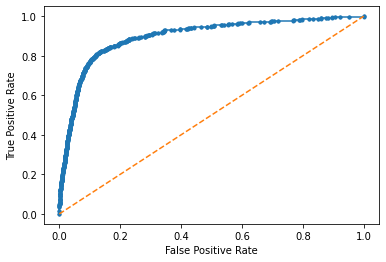

In [143]:
fpr, tpr, _ = roc_curve(y_test, y_test_pred)
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [144]:
roc_auc = roc_auc_score(y_test, y_test_pred)

In [145]:
roc_auc

0.8980812847584769

In [146]:
## Precision Recall curve for Highly Interpretable Logistic Regression Model

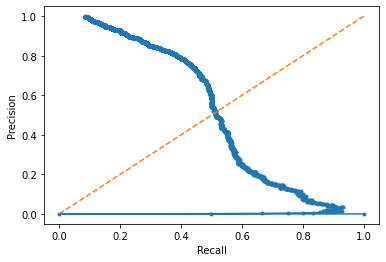

In [147]:
precision, recall, _ = precision_recall_curve(y_test, y_test_pred)
plt.plot(precision, recall, marker='.', label='Logistic')
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


In our Logistic Model, we put the threshold probability of 0.45 to have recall above 85% with precision just around 30%. The accuracy of the model is well above 80%. The reason we are going for higher recall is that the objective of our modelling is to capture as many churnable high value customers. In this case, our model will be able to predict 85% of actual churned customers. Anything beyond this recall will significantly reduce accuracy and precision of the model.

The features which are important for predicting churnable high value customers are-


1.   "onnet_mou_6"     with                      coeff of 0.1548   (positive effect)
2.   "offnet_mou_6"             with coeff of                 0.2182   (positive effect)
3.   "loc_og_t2m_mou_6"       with coeff of                -0.1892   (negative effect)
4.  "loc_og_mou_8"         with coeff of                  -0.9546   (negative effect 
5. "std_og_t2t_mou_8"        with coeff of               -0.1731   (negative effect)
6. "td_og_t2m_mou_8"        with coeff of                -0.2355   (negative effect)
7. "total_og_mou_7"         with coeff of                 0.1473   (positive effect)
8. "total_ic_mou_6"         with coeff of                 0.2180   (positive effect)
9. "total_ic_mou_7"         with coeff of                 0.4212   (positive effect)
10. "total_ic_mou_8"        with coeff of                 -1.7816   (negative effect)
11. "spl_ic_mou_7"           with coeff of                -0.7678   (negative effect)
12. "spl_ic_mou_8"         with coeff of                  -3.1045   (negative effect)
13. "total_rech_amt_7"        with coeff of                0.2676   (positive effect)
14. "max_rech_amt_8"         with coeff of                 0.1505   (positive effect)
15. "last_day_rch_amt_8"         with coeff of            -0.5320   (negative effect)
16. "night_pck_user_6"        with coeff of                0.3859   (positive effect)
17. "monthly_2g_6"            with coeff of               -0.5432   (negative effect)
18. "monthly_2g_8"         with coeff of                  -0.5850   (negative effect)
19. "monthly_3g_8"       with coeff of                    -0.3379   (negative effect)
20. "fb_user_8"          with coeff of                    -0.8850   (negative effect)
21. "aon"              with coeff of                     -0.6834   (negative effect)
22. "days_since_last_rech_in_last_3_months"  with coeff of  0.5649 -derivedfeature- (positive effect)




 

  

 
 
 

 


 

 
 
 
  
 
 

**USING GRIDSEARCHCV WITH DECISION TREES CLASSIFIER FOR HIGHLY INTERPRETABLE MODEL**

In [148]:
from sklearn.model_selection import GridSearchCV

In [149]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42)

In [150]:
params={"max_depth": [2,3,5,10,20],
        "min_samples_leaf": [5,10,20,50,100,500]}

In [151]:
grid_search=GridSearchCV(estimator=dt,param_grid=params,cv=4,n_jobs=-1,verbose=1, scoring="recall")

In [152]:
%%time
grid_result=grid_search.fit(X_over,y_over)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  2.8min finished


CPU times: user 5.47 s, sys: 152 ms, total: 5.62 s
Wall time: 2min 55s


In [153]:
grid_search.best_score_

0.9204545454545454

In [154]:
dt_best=grid_search.best_estimator_

In [155]:
churn_y_test_pred=dt_best.predict(robust_test)

In [156]:
churn_y_test_pred[:5]

array([0, 1, 0, 0, 0])

In [157]:
print("accuracy score with Decision tree is : ",accuracy_score(y_test,churn_y_test_pred))
print("recall score with Decision tree is : ",recall_score(y_test,churn_y_test_pred))

accuracy score with Decision tree is :  0.9049311417147934
recall score with Decision tree is :  0.7025974025974026


In [158]:
top25dts=pd.DataFrame(grid_result.cv_results_).sort_values(by="mean_test_score", ascending=False).head(25)

In [159]:
top25dts.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
18,4.234790,0.129206,0.010559,0.000172,10,5,"{'max_depth': 10, 'min_samples_leaf': 5}",0.830275,0.950584,0.949124,0.951835,0.920455,0.052074,1
19,4.262456,0.094434,0.008879,0.001453,10,10,"{'max_depth': 10, 'min_samples_leaf': 10}",0.827356,0.945163,0.940992,0.943912,0.914356,0.050252,2
24,6.745033,0.149553,0.010598,0.000246,20,5,"{'max_depth': 20, 'min_samples_leaf': 5}",0.815263,0.945580,0.938907,0.947456,0.911802,0.055827,3
27,5.193327,0.152950,0.009928,0.001273,20,50,"{'max_depth': 20, 'min_samples_leaf': 50}",0.824020,0.934112,0.936405,0.941827,0.909091,0.049196,4
21,4.031818,0.020722,0.009577,0.001210,10,50,"{'max_depth': 10, 'min_samples_leaf': 50}",0.824020,0.934112,0.936405,0.941827,0.909091,0.049196,4


In [160]:
for i,params in enumerate(top25dts["params"]):
  dt=DecisionTreeClassifier(random_state=50)                        # Comparing different decision tree models from grid search on precision, recall and accuracy
  print("Rank -", i+1, ":  Model test recall score")
  dt.set_params(**params)
  dt.fit(X_over,y_over)
  churn_y_test_pred=dt.predict(robust_test)
  print("accuracy score is : ",accuracy_score(y_test,churn_y_test_pred))
  print("recall score  is : ",recall_score(y_test,churn_y_test_pred))
  print(params)
  print("\n")


Rank - 1 :  Model test recall score
accuracy score is :  0.9045979564637938
recall score  is :  0.7077922077922078
{'max_depth': 10, 'min_samples_leaf': 5}


Rank - 2 :  Model test recall score
accuracy score is :  0.9072634384717904
recall score  is :  0.6857142857142857
{'max_depth': 10, 'min_samples_leaf': 10}


Rank - 3 :  Model test recall score
accuracy score is :  0.8967125721901377
recall score  is :  0.6220779220779221
{'max_depth': 20, 'min_samples_leaf': 5}


Rank - 4 :  Model test recall score
accuracy score is :  0.8977121279431364
recall score  is :  0.7285714285714285
{'max_depth': 20, 'min_samples_leaf': 50}


Rank - 5 :  Model test recall score
accuracy score is :  0.8986006219458018
recall score  is :  0.7298701298701299
{'max_depth': 10, 'min_samples_leaf': 50}


Rank - 6 :  Model test recall score
accuracy score is :  0.8931585961794758
recall score  is :  0.7181818181818181
{'max_depth': 20, 'min_samples_leaf': 100}


Rank - 7 :  Model test recall score
accuracy sc

In [161]:
## Fromt the above we can see that rank 16,17,18 model in grid search is giving us recall score for test set as 88%. Hence going with rank 18 model, we get the params as:

In [162]:
dt=DecisionTreeClassifier(max_depth= 2, min_samples_leaf= 500,random_state=150)





In [163]:
dt.fit(X_over,y_over)                                     # The best decision tree model having parameters as max_depth= 2, min_samples_leaf= 500,random_state=150, produced an accuracy of 76%, precision of 25% and recall of 88%
churn_y_test_pred=dt.predict(robust_test)
print("accuracy score is : ",accuracy_score(y_test,churn_y_test_pred))
print("recall score  is : ",recall_score(y_test,churn_y_test_pred))

accuracy score is :  0.7635495335406486
recall score  is :  0.8792207792207792


In [173]:
print("precision score  is : ",precision_score(y_test,churn_y_test_pred))

precision score  is :  0.24953925543678585


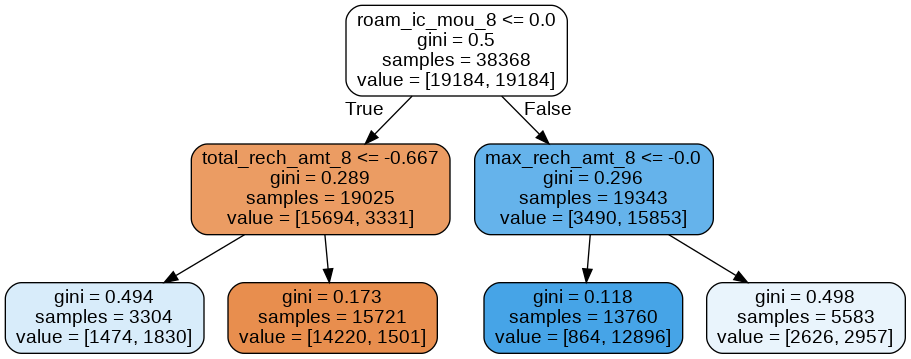

In [164]:
import IPython
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

dot_data=StringIO()
export_graphviz(dt, out_file=dot_data, filled=True, rounded=True, feature_names= X_over.columns)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Using Random Forests Classifier-- Not Interpretable but good model score

In [165]:
from sklearn.ensemble import RandomForestClassifier


In [166]:
rf=RandomForestClassifier(random_state=12)

In [180]:
params={"max_depth": [2,3,5,10,15],
        "min_samples_leaf": [5,10,50,100,200,500],
        'n_estimators': [200, 400, 600]
        }

In [181]:
grid_search=GridSearchCV(estimator=rf,param_grid=params,cv=4,n_jobs=-1,verbose=1, scoring="recall")

In [182]:
%%time
grid_result=grid_search.fit(X_over,y_over)

Fitting 4 folds for each of 90 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 53.8min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 157.4min finished


CPU times: user 3min 11s, sys: 387 ms, total: 3min 12s
Wall time: 2h 40min 31s


In [183]:
top50=pd.DataFrame(grid_result.cv_results_).sort_values(by="mean_test_score", ascending=False).head(50)

In [189]:
top50.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
74,158.776770,0.421188,1.088560,0.093699,15,5,600,"{'max_depth': 15, 'min_samples_leaf': 5, 'n_es...",0.893661,0.977690,0.974979,0.975813,0.955536,0.035737,1
72,54.077611,0.327108,0.319265,0.054725,15,5,200,"{'max_depth': 15, 'min_samples_leaf': 5, 'n_es...",0.892202,0.978107,0.974562,0.975813,0.955171,0.036377,2
73,106.764729,0.796550,0.915533,0.327196,15,5,400,"{'max_depth': 15, 'min_samples_leaf': 5, 'n_es...",0.893036,0.977690,0.974562,0.975396,0.955171,0.035892,2
76,105.545413,1.943896,0.677180,0.068045,15,10,400,"{'max_depth': 15, 'min_samples_leaf': 10, 'n_e...",0.883653,0.964971,0.964554,0.962260,0.943859,0.034776,4
77,155.909544,0.533738,1.101933,0.057486,15,10,600,"{'max_depth': 15, 'min_samples_leaf': 10, 'n_e...",0.883653,0.963511,0.963511,0.963511,0.943547,0.034580,5
75,51.011630,0.352042,0.379067,0.014192,15,10,200,"{'max_depth': 15, 'min_samples_leaf': 10, 'n_e...",0.881985,0.964554,0.963094,0.963511,0.943286,0.035396,6
56,130.119724,1.519191,0.995852,0.089433,10,5,600,"{'max_depth': 10, 'min_samples_leaf': 5, 'n_es...",0.887823,0.957673,0.958716,0.958924,0.940784,0.030581,7
55,86.312157,0.404737,0.614893,0.039379,10,5,400,"{'max_depth': 10, 'min_samples_leaf': 5, 'n_es...",0.887198,0.958090,0.956631,0.957048,0.939741,0.030341,8
54,43.469413,0.249319,0.295737,0.035344,10,5,200,"{'max_depth': 10, 'min_samples_leaf': 5, 'n_es...",0.886364,0.958090,0.956839,0.957256,0.939637,0.030761,9
57,42.422215,0.293049,0.312593,0.029341,10,10,200,"{'max_depth': 10, 'min_samples_leaf': 10, 'n_e...",0.882611,0.955171,0.949333,0.954545,0.935415,0.030571,10


In [190]:
rf_best=grid_search.best_estimator_
rf_best

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=12, verbose=0,
                       warm_start=False)

In [191]:
rf_best.fit(X_over,y_over)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=12, verbose=0,
                       warm_start=False)

In [193]:
rf_best.feature_importances_

array([2.46537337e-03, 3.84643257e-03, 3.45000510e-02, 2.47750351e-03,
       2.70632381e-03, 4.83280756e-03, 2.44168939e-03, 2.99051445e-03,
       9.63714372e-03, 1.96220712e-03, 6.21115204e-03, 1.05666717e-01,
       2.33225049e-03, 7.41965523e-03, 8.92695418e-02, 2.49444679e-03,
       2.67395189e-03, 1.13149229e-02, 2.39775507e-03, 3.33147558e-03,
       1.81901687e-02, 1.74750485e-03, 1.88473517e-03, 1.76468994e-03,
       9.88174876e-04, 1.30192447e-03, 1.92650329e-03, 2.40480371e-03,
       4.35988846e-03, 2.16172383e-02, 7.33803626e-03, 4.63495534e-03,
       5.64934339e-03, 3.93558745e-03, 3.42796039e-03, 2.81966287e-03,
       6.24705423e-04, 5.68343993e-04, 4.95615863e-04, 4.50492468e-03,
       3.71875769e-03, 5.83748600e-03, 1.55958029e-03, 2.00231888e-03,
       2.24862588e-03, 3.07902144e-03, 4.76883659e-03, 4.48916641e-03,
       3.00643256e-03, 1.40088833e-05, 2.54887740e-05, 2.15701888e-03,
       3.27862945e-03, 2.61878413e-02, 2.51728750e-03, 2.41833780e-03,
      

In [194]:
imp_df=pd.DataFrame({"Varname": X_over.columns, "Imp":rf_best.feature_importances_})

In [198]:
# Retrieving top 15 features for the best Random Forest estimator 

imp_df.sort_values(by="Imp", ascending=False).head(15)

,Varname,Imp
11,roam_ic_mou_8,0.105667
14,roam_og_mou_8,0.089270
151,days_since_last_rech_in_last_3_months,0.068093
80,total_ic_mou_8,0.064626
95,total_rech_amt_8,0.049603
98,max_rech_amt_8,0.048762
101,last_day_rch_amt_8,0.040136
2,arpu_8,0.034500
65,loc_ic_mou_8,0.029579
53,total_og_mou_8,0.026188


In [199]:
y_test_pred=rf_best.predict(robust_test)

In [200]:
print("accuracy score for the best estimator in RF is : ",accuracy_score(y_test,y_test_pred))
print("recall score for the best estimator in RF is : ",recall_score(y_test,y_test_pred))
print("precision score for the best estimator in RF is : ",precision_score(y_test,y_test_pred))

accuracy score for the best estimator in RF is :  0.9336961350510884
recall score for the best estimator in RF is :  0.7428571428571429
precision score for the best estimator in RF is :  0.5890834191555098


In [ ]:
## We can see that the best estimator in Random Forest gave us the overall best results like accuracy at 93%, precision at almost 60% and recall at almost 75%.

**APPLYING PCA**

In [201]:
from sklearn.decomposition import PCA

In [202]:
pca=PCA(random_state=150)

In [203]:
pca.fit(X_over)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=150,
    svd_solver='auto', tol=0.0, whiten=False)

In [204]:
pca.components_

array([[ 2.05966509e-04,  2.05942433e-04,  2.35415471e-04, ...,
         9.91917815e-02,  2.01088593e-01, -4.43654182e-06],
       [ 7.86815697e-05,  1.17375195e-05,  1.65815839e-05, ...,
         3.31010232e-03,  4.21634873e-03,  7.57695451e-06],
       [ 2.92336826e-04, -2.59555835e-04, -4.45132759e-04, ...,
        -2.56020897e-02,  1.73343853e-01,  5.28836166e-04],
       ...,
       [ 0.00000000e+00,  9.27762992e-17,  1.40195712e-16, ...,
        -4.57963190e-19, -5.44448050e-19,  1.86384659e-17],
       [ 0.00000000e+00, -4.77212343e-17, -2.13025425e-17, ...,
        -8.31264093e-20, -2.54087559e-20, -2.52619210e-17],
       [-0.00000000e+00, -1.08656718e-14, -6.00238099e-15, ...,
        -2.01335267e-18, -4.02337449e-19,  2.36467708e-15]])

In [205]:
var_cumu=np.cumsum(pca.explained_variance_ratio_)

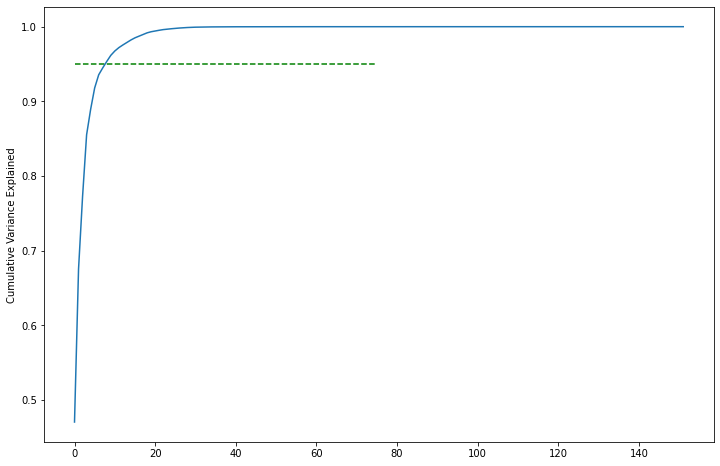

In [206]:
fig=plt.figure(figsize=[12,8])
plt.hlines(y=0.95 , xmax=75, xmin=0, colors="g", linestyle="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative Variance Explained")
plt.show()

In [207]:
from sklearn.decomposition import IncrementalPCA

In [208]:
pca_final = IncrementalPCA(n_components=10 )

In [210]:
df_train_pca=pca_final.fit_transform(X_over)

In [211]:
df_train_pca.shape

(38368, 10)

In [212]:
df_test_pca= pca_final.transform(robust_test)

In [214]:
df_test_pca

array([[-3.46456046e+02, -5.96614057e+01,  1.27947351e+01, ...,
        -1.63800415e+01, -1.89949857e+00, -4.68362845e+00],
       [-3.45688663e+02,  3.62956676e+01,  1.36170210e+01, ...,
        -1.55121514e+01, -2.00037845e+00, -4.68644972e+00],
       [ 1.93150894e+03, -1.64856658e+02, -2.21622401e+02, ...,
         1.84312640e+02, -2.81809798e+01,  7.24365121e+01],
       ...,
       [ 1.20225003e+03, -1.64972300e+02,  9.75098057e+02, ...,
        -4.90980889e+02,  4.57707405e+01,  1.45301524e+00],
       [-3.46981090e+02, -1.48465522e+02,  1.25516656e+01, ...,
        -1.70942692e+01, -4.47980523e+00, -4.78488351e+00],
       [ 1.40404630e+02, -1.50460819e+02,  9.98813339e+01, ...,
        -1.20634351e+02,  1.09916188e+01, -6.54003159e+01]])

Applying Logistic Regression on PCA DATASET

In [215]:
learner_pca=LogisticRegression()

In [216]:
model_pca=learner_pca.fit(df_train_pca,y_over)

In [217]:
pred_probs_test=model_pca.predict_proba(df_test_pca)

In [218]:
pred_probs_test[:5]

array([[0.48468997, 0.51531003],
       [0.4839672 , 0.5160328 ],
       [0.69664016, 0.30335984],
       [0.48467333, 0.51532667],
       [0.59378244, 0.40621756]])

In [220]:
from sklearn import metrics
"{:2.2}".format(metrics.roc_auc_score(y_test,pred_probs_test[:,1]))

'0.73'

In [225]:
churn_y_test_pred=pd.DataFrame(pred_probs_test[:,1])


In [226]:
churn_y_test_pred.head()

,0
0,0.515310
1,0.516033
2,0.303360
3,0.515327
4,0.406218


In [227]:
print(churn_y_test_pred.shape)

(9004, 1)


In [231]:
churn_y_test_pred["0.5"] = churn_y_test_pred[0].apply(lambda x: 1 if x>=0.5 else 0) 

In [232]:
print("accuracy score for the Logistic Regression after PCA is : ",accuracy_score(y_test,churn_y_test_pred["0.5"]))
print("recall score for the Logistic Regression after PCA is : ",recall_score(y_test,churn_y_test_pred["0.5"]))
print("precision score for the Logistic Regression after PCA is : ",precision_score(y_test,churn_y_test_pred["0.5"]))

accuracy score for the Logistic Regression after PCA is :  0.37627721012883164
recall score for the Logistic Regression after PCA is :  0.9064935064935065
precision score for the Logistic Regression after PCA is :  0.11182313361102211


In [233]:
churn_y_test_pred["0.4"] = churn_y_test_pred[0].apply(lambda x: 1 if x>=0.4 else 0) 

In [234]:
print("accuracy score for the Logistic Regression after PCA is : ",accuracy_score(y_test,churn_y_test_pred["0.4"]))
print("recall score for the Logistic Regression after PCA is : ",recall_score(y_test,churn_y_test_pred["0.4"]))
print("precision score for the Logistic Regression after PCA is : ",precision_score(y_test,churn_y_test_pred["0.4"]))

accuracy score for the Logistic Regression after PCA is :  0.2693247445579742
recall score for the Logistic Regression after PCA is :  0.961038961038961
precision score for the Logistic Regression after PCA is :  0.10152284263959391


In [235]:
## We see from PCA that while recall is phenomenal, accuracy of the model is very poor which makes our PCA Logistic Model useless.

In [236]:
## Applying Decision Tree on PCA model

In [237]:
dt=DecisionTreeClassifier(random_state=80)

In [238]:
params={"max_depth": [2,3,5,10,20],
        "min_samples_leaf": [5,10,20,50,100,500]}

In [239]:
grid_search=GridSearchCV(estimator=dt,param_grid=params,cv=4,n_jobs=-1,verbose=1, scoring="recall")

In [240]:
%%time
grid_result=grid_search.fit(df_train_pca,y_over)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   21.2s finished


CPU times: user 1.07 s, sys: 123 ms, total: 1.19 s
Wall time: 21.9 s


In [241]:
top25dts=pd.DataFrame(grid_result.cv_results_).sort_values(by="mean_test_score", ascending=False).head(25)

In [242]:
for i,params in enumerate(top25dts["params"]):
  dt=DecisionTreeClassifier(random_state=97)                          # Comparing different decision tree models from grid search on precision, recall and accuracy
  print("Rank -", i+1, ":  Model test recall score")
  dt.set_params(**params)
  dt.fit(df_train_pca,y_over)
  churn_y_test_pred=dt.predict(df_test_pca)
  print("accuracy score is : ",accuracy_score(y_test,churn_y_test_pred))
  print("recall score  is : ",recall_score(y_test,churn_y_test_pred))
  print("precision score  is : ",precision_score(y_test,churn_y_test_pred))
  print(params)
  print("\n")

Rank - 1 :  Model test recall score
accuracy score is :  0.7123500666370502
recall score  is :  0.6896103896103896
precision score  is :  0.1842470506592644
{'max_depth': 10, 'min_samples_leaf': 5}


Rank - 2 :  Model test recall score
accuracy score is :  0.7141270546423811
recall score  is :  0.6844155844155844
precision score  is :  0.18439468159552133
{'max_depth': 10, 'min_samples_leaf': 10}


Rank - 3 :  Model test recall score
accuracy score is :  0.7106841403820524
recall score  is :  0.6857142857142857
precision score  is :  0.18263576617087512
{'max_depth': 10, 'min_samples_leaf': 20}


Rank - 4 :  Model test recall score
accuracy score is :  0.7798756108396269
recall score  is :  0.474025974025974
precision score  is :  0.18795056642636457
{'max_depth': 20, 'min_samples_leaf': 5}


Rank - 5 :  Model test recall score
accuracy score is :  0.712239004886717
recall score  is :  0.687012987012987
precision score  is :  0.18374435567905523
{'max_depth': 10, 'min_samples_leaf': 50

By far the best decision tree on PCA model we could get- 
accuracy score is :  66%
recall score  is :  78%
precision score  is :  17%
{'max_depth': 5, 'min_samples_leaf': 100}

In [243]:
## Applying Random Forests on PCA set

In [244]:
rf=RandomForestClassifier(random_state=53)

In [255]:
params={"max_depth": [2, 5, 10, 15],
        "min_samples_leaf": [20,50,100,200],
        'n_estimators': [200, 400,600]
        }
        

In [256]:
grid_search=GridSearchCV(estimator=rf,param_grid=params,cv=4,n_jobs=-1,verbose=1, scoring="recall")

In [257]:
%%time
grid_result=grid_search.fit(df_train_pca,y_over)

Fitting 4 folds for each of 48 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed: 46.4min finished


CPU times: user 29.3 s, sys: 154 ms, total: 29.4 s
Wall time: 46min 52s


In [258]:
rf_best=grid_search.best_estimator_
rf_best

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=103,
                       verbose=0, warm_start=False)

In [259]:
rf_best.fit(df_train_pca,y_over)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=103,
                       verbose=0, warm_start=False)

In [260]:
y_test_pred=rf_best.predict(df_test_pca)

In [261]:
print("accuracy score for the best estimator in RF on PCA is : ",accuracy_score(y_test,y_test_pred))
print("recall score for the best estimator in RF on PCA is : ",recall_score(y_test,y_test_pred))
print("precision score for the best estimator in RF on PCA is : ",precision_score(y_test,y_test_pred))

accuracy score for the best estimator in RF on PCA is :  0.7825410928476233
recall score for the best estimator in RF on PCA is :  0.6623376623376623
precision score for the best estimator in RF on PCA is :  0.23097826086956522


## As we can see above that the best random forests ensemble on PCA produced an accuracy of 78%, recall of 66% and precision of 23% which is better than Logistic Regression on PCA and Simple Decision Tree Method on PCA. 

## The important observation is-
1. PCA reduced the time required for the modelling.
2. It produced somewhat comparable results.
3. However, it falls behind in accuracy and recall on the models without PCA.
4. Also PCA is not ideal to be used in this case as PCA does not tell anything about the actionable parameters. Hence it is not very useful to marketing or sales dept, which need features to create an action-plan.

**Churn Predictors**

The important Churn Predictors(retrieved from Logistic Regression without PCA) are reproduced again-



1.   "onnet_mou_6"     with                      coeff of 0.1548   (positive effect)
2.   "offnet_mou_6"             with coeff of                 0.2182   (positive effect)
3.   "loc_og_t2m_mou_6"       with coeff of                -0.1892   (negative effect)
4.  "loc_og_mou_8"         with coeff of                  -0.9546   (negative effect 
5. "std_og_t2t_mou_8"        with coeff of               -0.1731   (negative effect)
6. "std_og_t2m_mou_8"        with coeff of                -0.2355   (negative effect)
7. "total_og_mou_7"         with coeff of                 0.1473   (positive effect)
8. "total_ic_mou_6"         with coeff of                 0.2180   (positive effect)
9. "total_ic_mou_7"         with coeff of                 0.4212   (positive effect)
10. "total_ic_mou_8"        with coeff of                 -1.7816   (negative effect)
11. "spl_ic_mou_7"           with coeff of                -0.7678   (negative effect)
12. "spl_ic_mou_8"         with coeff of                  -3.1045   (negative effect)
13. "total_rech_amt_7"        with coeff of                0.2676   (positive effect)
14. "max_rech_amt_8"         with coeff of                 0.1505   (positive effect)
15. "last_day_rch_amt_8"         with coeff of            -0.5320   (negative effect)
16. "night_pck_user_6"        with coeff of                0.3859   (positive effect)
17. "monthly_2g_6"            with coeff of               -0.5432   (negative effect)
18. "monthly_2g_8"         with coeff of                  -0.5850   (negative effect)
19. "monthly_3g_8"       with coeff of                    -0.3379   (negative effect)
20. "fb_user_8"          with coeff of                    -0.8850   (negative effect)
21. "aon"              with coeff of                     -0.6834   (negative effect)
22. "days_since_last_rech_in_last_3_months"  with coeff of  0.5649 -derivedfeature- (positive effect)


**It is recommended that-**



*   all kinds of voice calls within the same operator network should be made more attractive to other operators as well. There is a chance that "within operator" network is cheaper compared to cross operator calls. This may lead to the customers switching to different operators. Another possibility is to increase the network of people on the comapany's operator. This will reduce the chance of churn.

*   Clearly local outgoing calls to other operators are important as it drive down the probability of churning. Hence it should continue to cost effective.

*   Same goes for STD calls, within the same operator and across operator charges if very cheap, reduces churn.

*   Interestingly, customers with high total minutes of usage of incoming calls "in good phase" has higher probability of churning- This could be because the audio quality is poor, with frequent call drops etc. The company needs to look into the technical reasons.

*   Special calls are attractive as it reduces the probability of churning and hence should be continued and promoted.

*   Total recharge amount in good phase and Maximum recharge amount in action phase if higher, it may lead to churn. This may be because either the the cost of packages are higher which may lead to customer dissatisfaction or the user does not have many affordable options which is more suitable to his daily needs. The company needs to come with more flexible packages.

*   In action phase, if recharge amount is higher, the customer has less chance of churning, which is obvious. However, this shows that getting customers access to affordable bundle packages appropriate to their needs can reduce churn.

*   night pack user in good phase has higher churn probability- this means that night pack are not as per the mket standard and the competitors may be selling cheaper packs. The consumers may be having troubles with night packs maybe in usage or problems in activating it.

*   Data Packs are very decisive in reducing churn. As we can see from the coefficients of the 2g, 3g data and fb users(described above), negative and large value of coficients drive home the point that affordable high speed data packs will keep the customers away from churning.

*   More the number of days the consumer is on the network, less is the churn. This is obvious as every important government document, app logins, ecommerce websites, bank accounts require phone numbers. So higher the days the consumer has used the operator, very less likey for him to churn. Therefore, the comapny needs to focus on new customers.

*   Last but not the least, derived feature- "days since last recharge in last 3 months" describes an idea that the user if recharged recently i.e in action phase, less likely he is to churn. Hence operator needs to actively enage with them in action phase, through telemarketing, app notofications, easy attractive payment options, good bundle packages, attractive add-ons like subscription to OTT platforms etc to make customers recharge  in the action phase.


